<a href="https://colab.research.google.com/github/rainforest01-coder/ESAA_files/blob/main/ESAA_WEEK08_1%ED%9A%8C%EA%B7%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#01 회귀
머신러닝 회귀 예측: 최적의 회귀 계수 찾아내기

유형:
* 독립변수 개수: 단일회귀, 다중회귀
* 회귀 계수 결합: 선형회귀, 비선형회귀
  * 규제 방식:
  일반 선형 회귀(RSS),   
  릿지(L2규제 추가-회귀계수 감소),  
  라쏘(L1규제 추가-예측 영향 작은 피처 계수 0),  
   엘라(L1+L2)  
   로지스틱 회귀(사실은 클래스)  

클래스: 예측값이 이산형 클래스
회귀: 연속형 숫자값



#02 단순 선형 회귀를 통한 회귀 이해

단순선형회귀: 독립변수 1개, 종속변서 1개

Y=w0+w1*X+오류값

오류합 최소화
* MAE(Mean Absolute Error): 절댓값 취해 합
* RSS(Residual Sum of Square): 제곱 합(비용)
  *비용함수/loss function(w에 대한 함수)

  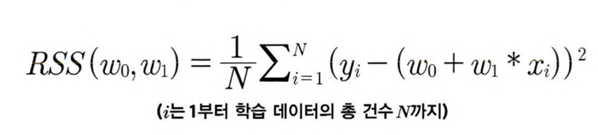

#03 비용 최소화하기-경사 하강법 소개

경사하강법: 점진적으로 반복적인 계산을 통해 W파라미터 값을 업데이트 하면서 오류 값이 최소가 되는 W파라미터를 구하는 방식

각 계수에대해 편미분한 값을 빼 다음 계수로 비용함수 계산

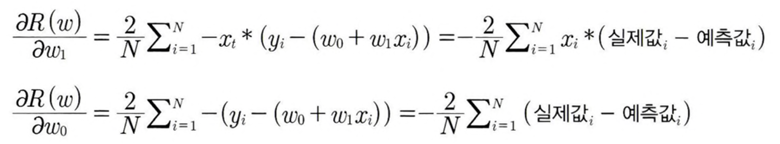

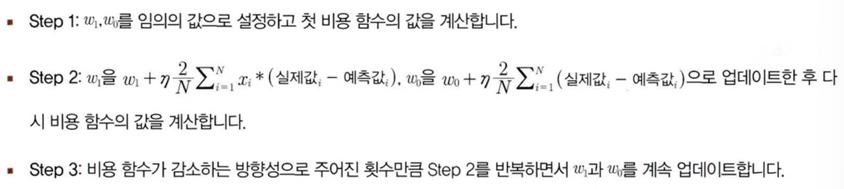

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

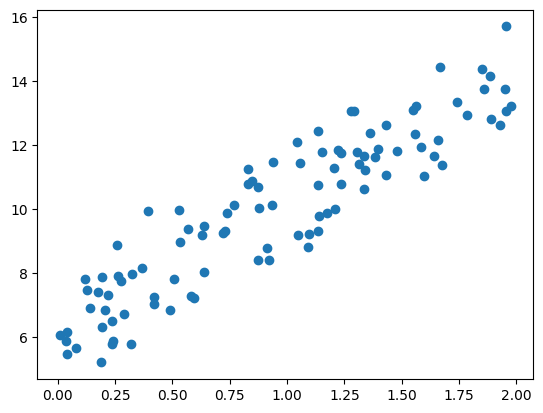

In [3]:
np.random.seed(0)
X=2*np.random.rand(100,1)
y=6+4*X+ np.random.randn(100,1)
plt.scatter(X,y)

비용함수 정의

In [4]:
def get_cost(y,y_pred):
  N=len(y)
  cost=np.sum(np.square(y-y_pred))/N
  return cost

경사하강법 함수 생성 및 구현

In [9]:
def get_weight_updates(w1,w0,X,y,learning_rate=0.01):
  N=len(y)
  w1_update=np.zeros_like(w1)
  w0_update=np.zeros_like(w0)
  y_pred=np.dot(X,w1.T)+w0
  diff=y-y_pred
  w0_factors=np.ones((N,1))

  w1_update=-(2/N)*learning_rate*(np.dot(X.T,diff))
  w0_update=-(2/N)*learning_rate*(np.dot(w0_factors.T,diff))
  return w1_update, w0_update

경사하강방식으로 반복 수행하여 업데이트하는 함수 생성

In [6]:
def gradient_descent_steps(X,y,iters=10000):
  w0=np.zeros((1,1))
  w1=np.zeros((1,1))

  for ind in range(iters):
    w1_update,w0_update=get_weight_updates(w1,w0,X,y,learning_rate=0.01)
    w1=w1-w1_update
    w0=w0-w0_update
  return w1,w0

최종적으로 예측값과 실제값 RSS차이 계산 함수 생성

In [10]:
def get_cost(y,y_pred):
  N=len(y)
  cost=np.sum(np.square(y-y_pred))/N
  return cost
w1,w0=gradient_descent_steps(X,y,iters=1000)
print("w1:{0:.3f} w0:{1:.3f}".format(w1[0,0],w0[0,0]))
y_pred=w1[0,0]*X+w0
print('Gradient Descent Total Cost:{0:.4f}'.format(get_cost(y,y_pred)))


w1:4.022 w0:6.162
Gradient Descent Total Cost:0.9935


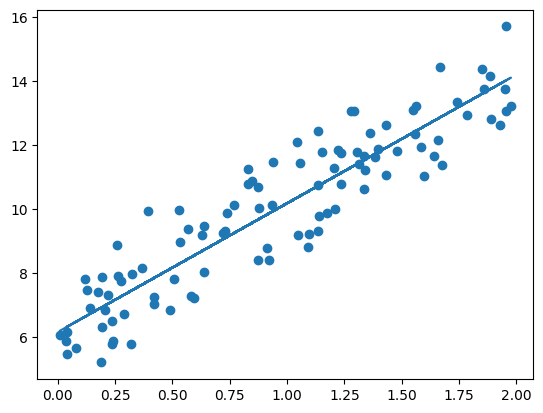

In [11]:
plt.scatter(X,y)
plt.plot(X,y_pred)

경사하강법 시간 오래걸림
> 확률적 경사 하강: 일부 데이터만 이용해 W가 업데이트 되는 값을 계산

미니배치 확률적 경사 하강법 구현

In [15]:
def stochastic_gradient_descent_steps(X,y,batch_size=10,iters=1000):
  w0=np.zeros((1,1))
  w1=np.zeros((1,1))
  for ind in range(iters):
    np.random.seed(ind)
    stochastic_random_index=np.random.permutation(X.shape[0])
    sample_X=X[stochastic_random_index[0:batch_size]]
    sample_y=y[stochastic_random_index[0:batch_size]]
    w1_update,w0_update=get_weight_updates(w1,w0,sample_X,sample_y,learning_rate=0.01)
    w1=w1-w1_update
    w0=w0-w0_update

  return w1,w0

In [16]:
w1,w0=stochastic_gradient_descent_steps(X,y,iters=1000)
print('w1:',round(w1[0,0],3),'w0:',round(w0[0,0],3))
y_pred=w1[0,0]*X+w0
print('Stochastic Gradient Descent Total Cost:{0:.4f}'.format(get_cost(y,y_pred)))

w1: 4.028 w0: 6.156
Stochastic Gradient Descent Total Cost:0.9937


예측 성능 큰차이 없음

피처가 여러개라면?

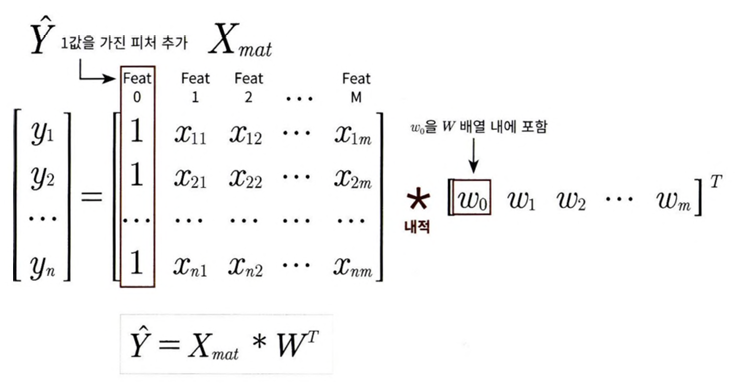

#04 사이킷런 LinearRegression을 이용한 보스턴 주택 가격 예측



In [1]:
from sklearn.linear_model import LinearRegression

linear_regression_model = LinearRegression(fit_intercept=True, n_jobs=1)

속성
* coef_: 회귀계수가 배열형태로 저장/shape=(target값 개수, 피처 개수)
* intercept_: intercept값


입력 파라미터
* fit_intercept: 불린값/디폴트 True/ False시 y절편 0
* normalize: 불린값/ 디폴트 False/True시 회귀를 수행하기 전에 입력 데이터 세트 정규화

다중공선성 문제:  
* Ordinary Least Square 기반의 회귀 계수계산은 입력 피처의 독립성에 맣은 영향 받아 피처간의 상관관계가 매우 높은 경우 분산이 매우 커져 오류에 매우 민감해짐
* 상관관계가 높은 피처가 많은 경우 독립적ㅇ니 중요 피처만 남기고 제거하거나 규제 적용
* PCA통해 차원 축소 수행 고려

##회귀 평가 지표

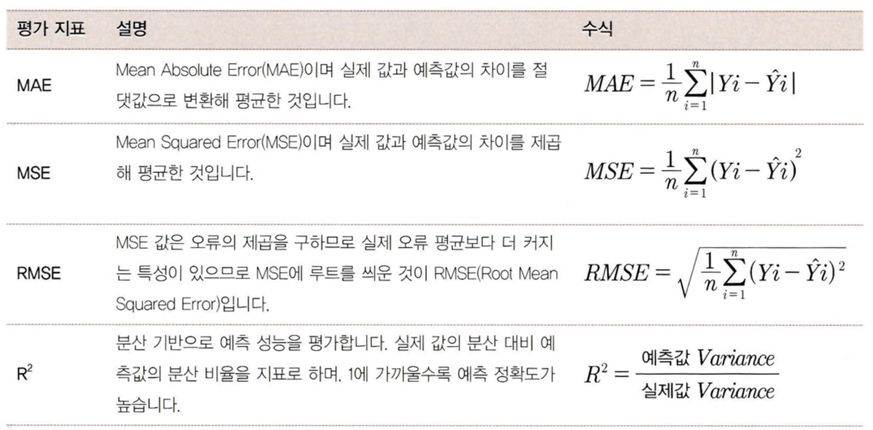

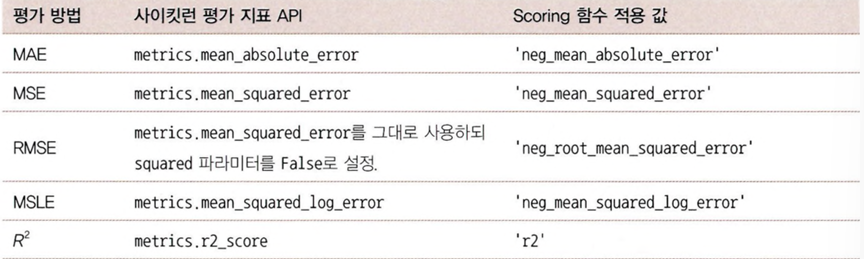

scoring 함수에 neg_mean_absolute_error를 적용해 음수값 반환하는 이유: 사이킷런의 scoring함수가 score 값이 클수록 좋은 평가 결과로 자동 평가하므로
> metrics.mean_absolute_error()와 같은 사이킷런 평가 지표 Api는 정상적으로 양수값 반환
> 그러나 Scoring함수의 scoring파라미터값은 음수

In [3]:
import pandas as pd
import numpy as np
data_url = "http://lib.stat.cmu.edu/datasets/boston"

raw_df = pd.read_csv(data_url, sep=r"\s+", skiprows=22, header=None)

data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])

target = raw_df.values[1::2, 2]

feature_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
bostonDF=pd.DataFrame(data,columns=feature_names)
bostonDF['PRICE']=target
print('Boston 데이터 크기:',bostonDF.shape)
display(bostonDF.head())


Boston 데이터 크기: (506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


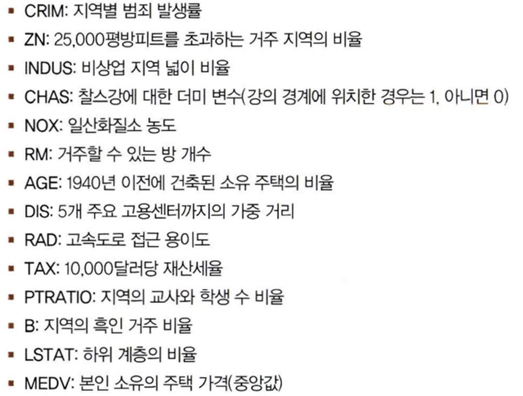

regplot()함수는 X,Y축 값의 산점도와 함께 선형 회귀 직선을 그려줌  
맷플롯립의 subplot()으로 여러 그래프 한번에 표현

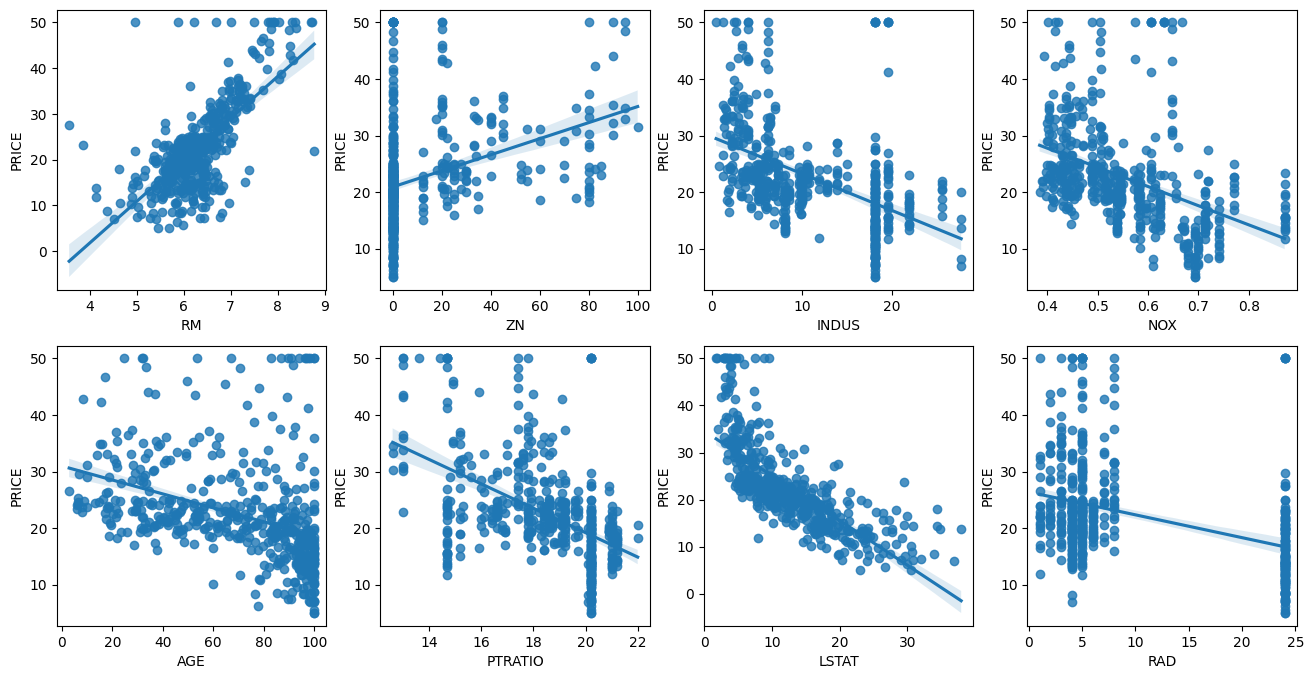

In [5]:
fig,axs=plt.subplots(figsize=(16,8),ncols=4,nrows=2)
lm_features=['RM','ZN','INDUS','NOX','AGE','PTRATIO','LSTAT','RAD']
for i,features in enumerate(lm_features):
  row=int(i/4)
  col=i%4
  sns.regplot(x=features,y='PRICE',data=bostonDF,ax=axs[row][col])

RM, LSTAT의 PRICE영향도 가장 두드러짐

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
y_target=bostonDF['PRICE']
X_data=bostonDF.drop(['PRICE'],axis=1,inplace=False)
X_train,X_test,y_train,y_test=train_test_split(X_data,y_target,test_size=0.3,random_state=156)
lr=LinearRegression()

lr.fit(X_train, y_train)
y_preds=lr.predict(X_test)
mse=mean_squared_error(y_test,y_preds)
rmse=np.sqrt(mse)
print('MSE:{0:.3f},RMSE:{1:.3F}'.format(mse,rmse))
print('Variance score: {0:.3f}'.format(r2_score(y_test,y_preds)))

MSE:17.297,RMSE:4.159
Variance score: 0.757


In [8]:
print('절편 값:',lr.intercept_)
print('회귀 계수 값:',np.round(lr.coef_,1))

절편 값: 40.995595172164826
회귀 계수 값: [ -0.1   0.1   0.    3.  -19.8   3.4   0.   -1.7   0.4  -0.   -0.9   0.
  -0.6]


In [9]:
coeff=pd.Series(data=np.round(lr.coef_,1),index=X_data.columns)
coeff.sort_values(ascending=False)

,0
RM,3.4
CHAS,3.0
RAD,0.4
ZN,0.1
INDUS,0.0
B,0.0
TAX,-0.0
AGE,0.0
CRIM,-0.1
LSTAT,-0.6


###교차검증 cross_val_score()
음수값 반환 주의

In [11]:
from sklearn.model_selection import cross_val_score
y_target=bostonDF['PRICE']
X_data=bostonDF.drop(['PRICE'],axis=1,inplace=False)
lr=LinearRegression()

neg_mse_scores=cross_val_score(lr,X_data,y_target,scoring='neg_mean_squared_error',cv=5)
rmse_scores=np.sqrt(-1*neg_mse_scores)
avg_rmse=np.mean(rmse_scores)

print('5 folds의 개별 Negative MSE scores: ',np.round(neg_mse_scores,2))
print('5 folds 의 개별 RMSE scores: ', np.round(rmse_scores,2))
print('5 folds 의 개별 평균 RMSE: {0:.3f}'.format(avg_rmse))


5 folds의 개별 Negative MSE scores:  [-12.46 -26.05 -33.07 -80.76 -33.31]
5 folds 의 개별 RMSE scores:  [3.53 5.1  5.75 8.99 5.77]
5 folds 의 개별 평균 RMSE: 5.829


#05 다항 회귀와 과적합/과소적합 이해
## 다항 회귀 이해
회귀가 독립 변수의 단항식이 아닌 2차 이상의 방정식과 같은 다항식으로 표현되는 것을 다항 회귀라고 함

* 주의: 다항회귀는 선형회귀임/ 선형 비선형을 나누는 기준은 회귀 계수가 선형 비선형인지에 따른 것이지 독립변수에 따른 것 아님

사이킷런은 다항 회귀를 위한 클래스 명시적으로 제공하지 않음  
대신 다항 회귀 역시 선형회귀 이므로 비선형 함수를 선형 모델에 적용하는 방법을 사용해 구현
> polynomialFeatures 클래스를 통해 다항식 피처로 변환/ 해당 클래스는 degree파라미터를 통해 입력받은 단항식 피처를 degree에 해당하는 다항식 피처로 변환/fit(), transform()사용

In [12]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
X=np.arange(4).reshape(2,2)
print('일차 단항식 계수 피처:\n',X)
poly=PolynomialFeatures(degree=2)
poly.fit(X)
poly_ftr=poly.transform(X)
print(('변환된 2차 다항식 계수 피처:\n', poly_ftr))

일차 단항식 계수 피처:
 [[0 1]
 [2 3]]
('변환된 2차 다항식 계수 피처:\n', array([[1., 0., 1., 0., 0., 1.],
       [1., 2., 3., 4., 6., 9.]]))


3차

In [13]:
def polynomial_func(X):
  y=1+2*X[:,0]+3*X[:,0]**2+4*X[:,1]**3
  return y
X=np.arange(4).reshape(2,2)
print('일차 단항식 계수 feature:\n',X)
y=polynomial_func(X)
print('삼차 다항식 결정값:\n',y)

일차 단항식 계수 feature:
 [[0 1]
 [2 3]]
삼차 다항식 결정값:
 [  5 125]


In [14]:
poly_ftr=PolynomialFeatures(degree=3).fit_transform(X)
print('3차 다항식 계수 feature:\n',poly_ftr)
model=LinearRegression()
model.fit(poly_ftr,y)
print('Polynomial 회귀 계수:\n',np.round(model.coef_,2))
print('Polynomial 회귀 Shape:',model.coef_.shape)

3차 다항식 계수 feature:
 [[ 1.  0.  1.  0.  0.  1.  0.  0.  0.  1.]
 [ 1.  2.  3.  4.  6.  9.  8. 12. 18. 27.]]
Polynomial 회귀 계수:
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]
Polynomial 회귀 Shape: (10,)


Pipeline객체를 이용해 한번에 다항 회귀 구현

In [15]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import numpy as np
def polynomial_func(X):
  y=1+2*X[:,0]+3*X[:,0]**2+4*X[:,1]**3
  return y
X=np.arange(4).reshape(2,2)
y=polynomial_func(X)

model=Pipeline([('poly',PolynomialFeatures(degree=3)),('linear',LinearRegression())])
model.fit(X,y)
print('Polynomial 회귀 계수\n',np.round(model.named_steps['linear'].coef_,2))


Polynomial 회귀 계수
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]


## 다항 회귀를 이용한 과소적합 및 과적합 이해

차수를 높일수록 학습 데이터에만 맞춘 학습이 이루어져 오히려 테스트환경 예측 정확도 떨어짐
즉 차수 높아질수록 과적합 문제 크게 발생

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
%matplotlib inline
def true_fun(X):
  return np.cos(1.5*np.pi*X)
np.random.seed(0)
n_samples=30
X=np.sort(np.random.rand(n_samples))
y=true_fun(X)+ np.random.randn(n_samples)*0.1

차수 1,4,15로 변경하며 예측 결과 비교


Degree1 회귀계수는 [-1.61]입니다.
Degree 1 MSE 는 0.4077289625098685입니다.

Degree4 회귀계수는 [  0.47 -17.79  23.59  -7.26]입니다.
Degree 4 MSE 는 0.04320874987232064입니다.

Degree15 회귀계수는 [-2.98293000e+03  1.03899390e+05 -1.87416123e+06  2.03716219e+07
 -1.44873283e+08  7.09315363e+08 -2.47065792e+09  6.24561050e+09
 -1.15676510e+10  1.56894936e+10 -1.54006023e+10  1.06457264e+10
 -4.91377530e+09  1.35919645e+09 -1.70380786e+08]입니다.
Degree 15 MSE 는 181238256.56423894입니다.


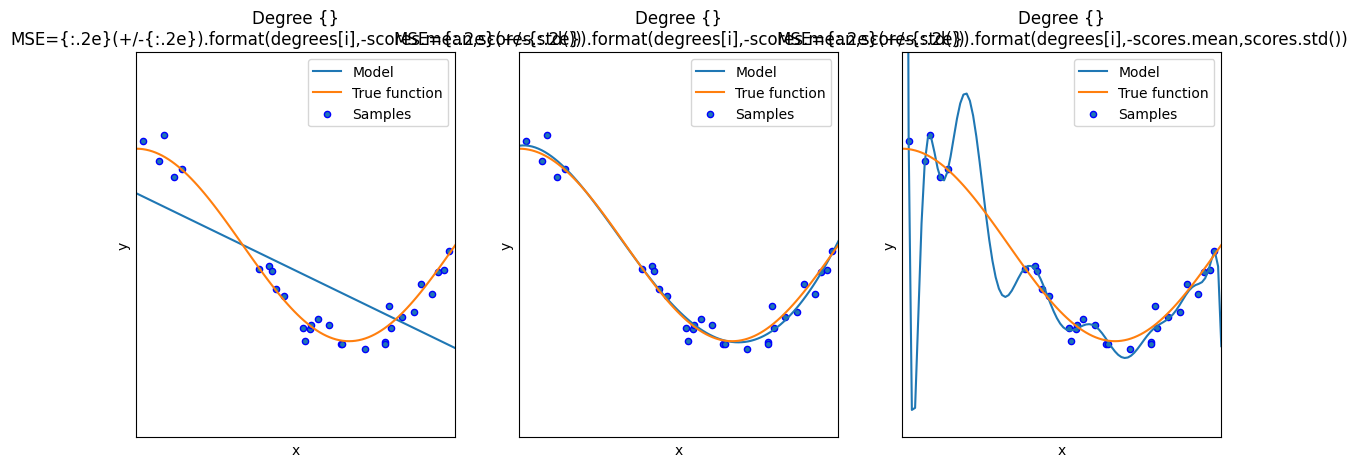

In [19]:
plt.figure(figsize=(14,5))
degrees=[1,4,15]

for i in range(len(degrees)):
  ax=plt.subplot(1,len(degrees),i+1)
  plt.setp(ax,xticks=(),yticks=())
  polynomial_features=PolynomialFeatures(degree=degrees[i],include_bias=False)
  linear_regression=LinearRegression()
  pipeline=Pipeline([('polynomial_features',polynomial_features),('linear_regression',linear_regression)])
  pipeline.fit(X.reshape(-1,1),y)

  scores=cross_val_score(pipeline,X.reshape(-1,1),y,scoring='neg_mean_squared_error',cv=10)
  # Pipeline을 구성하는 세부 객체를 접근하는 named_steps[’객체명,]을 이용해 회귀계수 추출
  coefficients=pipeline.named_steps['linear_regression'].coef_
  print('\nDegree{0} 회귀계수는 {1}입니다.'.format(degrees[i],np.round(coefficients,2)))
  print('Degree {0} MSE 는 {1}입니다.'.format(degrees[i],-1* np.mean(scores)))

  X_test=np.linspace(0,1,100)
  plt.plot(X_test,pipeline.predict(X_test[:,np.newaxis]),label='Model')
  plt.plot(X_test,true_fun(X_test),'-',label='True function')
  plt.scatter(X,y,edgecolors='b',s=20,label='Samples')
  plt.xlabel('x')
  plt.ylabel('y')
  plt.xlim((0,1))
  plt.ylim((-2,2))
  plt.legend(loc='best')
  plt.title('Degree {}\nMSE={:.2e}(+/-{:.2e}).format(degrees[i],-scores.mean,scores.std())')
plt.show()


degree15 라는 복잡한 다항식을 만족하기 위해 계산된 회귀 계수는 결국 현실과 너무 동떨어진 예측 결과 보여줌
> 지나치게 단순화X, 지나치게 과적합X 균형잡힌 모델이 좋은 예측 모델

## 편향-분산 트레이드 오프
degree1:  매우 단순화된 모델로 지나치게 한 방향성으로 치우침->고편향성  

degree15: 학습 데이터 하나하나의 특성을 반영하여 매우 복잡한 모델이 되었고 지나치게 높은 변동성 가짐-> 고분산성

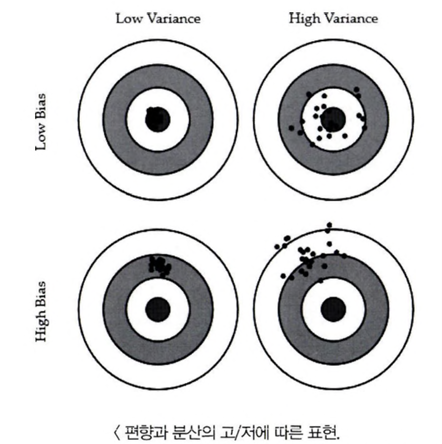

편향 증가시 분산감소/ 분산증가시 편향 감소

고편향, 저분산: 과소적합 쉬움

저편향, 고분산: 과적합 쉬움
> 오류cost값 최대로 낮아지는 모델 구축해야함

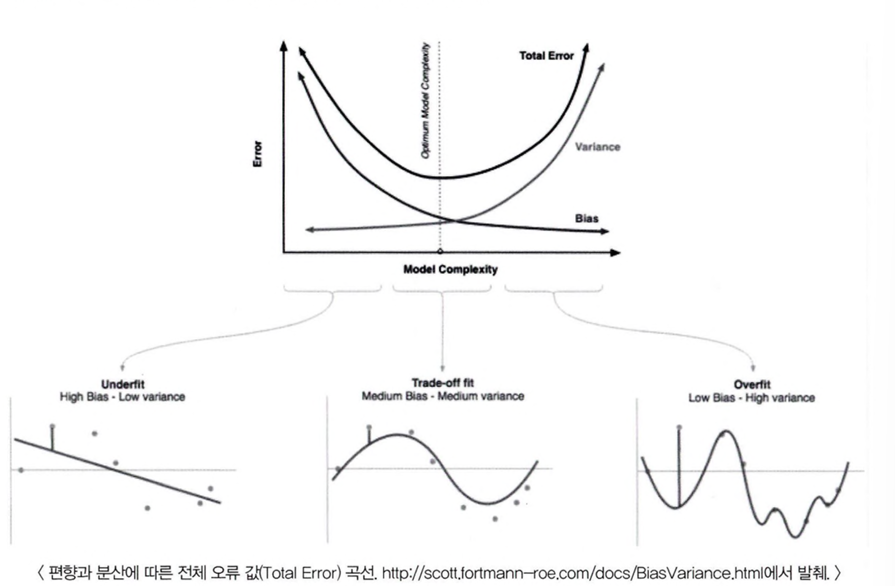